# Create Vacancy Jobs

# Post Vacancy

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

from ase.io import read,write
from ase.mep import DyNEB
from mace.calculators.mace import MACECalculator

In [7]:
# read in the start and end structures 
#start_structure = read('./scratch/data/vasp_jobs-neb-test/vac/Cr5Ti9V107W4Zr3/Start_Index_34/OUTCAR')
#end_structure = read('./scratch/data/vasp_jobs-neb-test/vac/Cr5Ti9V107W4Zr3/End_Index_110/OUTCAR')
start_structure = read('./scratch/data/vasp_jobs-neb-test/vac/Cr4Ti7V111W4Zr2/Start_Index_14/OUTCAR')
end_structure = read('./scratch/data/vasp_jobs-neb-test/vac/Cr4Ti7V111W4Zr2/End_Index_15/OUTCAR')

In [8]:
images = [start_structure.copy() for i in range(6)]
images.append(end_structure.copy())

print(images)
print(len(images))

[Atoms(symbols='Cr4Ti7V110W4Zr2', pbc=True, cell=[[12.093483239, -0.001965245, -0.001402732], [-0.001967216, 12.088895931, 0.017572922], [-0.001397384, 0.01757218, 12.092468779]]), Atoms(symbols='Cr4Ti7V110W4Zr2', pbc=True, cell=[[12.093483239, -0.001965245, -0.001402732], [-0.001967216, 12.088895931, 0.017572922], [-0.001397384, 0.01757218, 12.092468779]]), Atoms(symbols='Cr4Ti7V110W4Zr2', pbc=True, cell=[[12.093483239, -0.001965245, -0.001402732], [-0.001967216, 12.088895931, 0.017572922], [-0.001397384, 0.01757218, 12.092468779]]), Atoms(symbols='Cr4Ti7V110W4Zr2', pbc=True, cell=[[12.093483239, -0.001965245, -0.001402732], [-0.001967216, 12.088895931, 0.017572922], [-0.001397384, 0.01757218, 12.092468779]]), Atoms(symbols='Cr4Ti7V110W4Zr2', pbc=True, cell=[[12.093483239, -0.001965245, -0.001402732], [-0.001967216, 12.088895931, 0.017572922], [-0.001397384, 0.01757218, 12.092468779]]), Atoms(symbols='Cr4Ti7V110W4Zr2', pbc=True, cell=[[12.093483239, -0.001965245, -0.001402732], [-0.00

In [9]:
for image in images:
    image.calc = MACECalculator(model_paths=["./forge/tests/resources/potentials/mace/gen_5_model_0-11-28_stagetwo.model"], device='cuda',enable_cueq=True, default_dtype='float32')


Converting models to CuEq for acceleration
Converting models to CuEq for acceleration
Converting models to CuEq for acceleration
Converting models to CuEq for acceleration
Converting models to CuEq for acceleration
Converting models to CuEq for acceleration
Converting models to CuEq for acceleration


In [10]:
neb = DyNEB(images)
neb.interpolate(mic=True)

In [11]:
write('./scratch/data/vasp_jobs-neb-test/vac/Cr4Ti7V111W4Zr2/neb_images.xyz', images)

### Psuedo code for making the vasp neb job

In [ ]:
from ase.io import read,write
from ase.mep import DyNEB

start_structure = read('./scratch/data/vasp_jobs-neb-test/vac/Cr4Ti7V111W4Zr2/Start_Index_14/OUTCAR')
end_structure = read('./scratch/data/vasp_jobs-neb-test/vac/Cr4Ti7V111W4Zr2/End_Index_15/OUTCAR')

images = [start_structure.copy() for i in range(6)]
images.append(end_structure.copy())

neb = DyNEB(images)
neb.interpolate(mic=True)

# make vasp neb job from the images
# from 00 to 0X where X = len(images) - 1, put each image in the correct directory, i.e images[0] in 00, images[1] in 01, etc. 
# copy the OUTCAR from the start and end structures to the 00 and 0X directories
# use the neb-vtst or neb.json file to create the INCAR, KPOINTS, and POTCAR files 
# use an hpc profile (for now Perlmutter-GPU-NEB.json) to create the slurm script in that folder

# Using new prepare_neb_vasp_job function


In [3]:
import os
from forge.workflows.db_to_vasp import prepare_neb_vasp_job

os.environ['VASP_PP_PATH'] = '/home/myless/Packages/VASP/POTCAR_64_PBE'
start_path = '/home/myless/Packages/forge/scratch/data/vasp_jobs-neb-test/vac/Cr4Ti7V111W4Zr2/Start_Index_14/OUTCAR'
end_path = '/home/myless/Packages/forge/scratch/data/vasp_jobs-neb-test/vac/Cr4Ti7V111W4Zr2/End_Index_15/OUTCAR'
output_dir = '/home/myless/Packages/forge/scratch/data/vasp_jobs-neb-test/neb/Cr4Ti7V111W4Zr2_14_to_15/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

prepare_neb_vasp_job(start_outcar=start_path,
                    end_outcar=end_path,
                    n_images=5,
                    vasp_profile_name='neb-vtst',
                    hpc_profile_name='Perlmutter-GPU-NEB',
                    output_dir= output_dir,
                    job_name='Cr4Ti7V111W4Zr2_14_to_15')

[INFO] Created NEB job in /home/myless/Packages/forge/scratch/data/vasp_jobs-neb-test/neb/Cr4Ti7V111W4Zr2_14_to_15/ using HPC=Perlmutter-GPU-NEB, VASP=neb-vtst
[INFO] NEB path visualization saved to /home/myless/Packages/forge/scratch/data/vasp_jobs-neb-test/neb/Cr4Ti7V111W4Zr2_14_to_15/neb_path.xyz


# Testing new defects

In [9]:
from dataclasses import dataclass
from typing import List, Tuple, Optional
import numpy as np
from ase import Atoms, Atom
from ase.build import bulk, surface
from ase.visualize import view
import numpy.linalg as la

@dataclass
class BCCDefectParams:
    a0: float     # lattice parameter
    size: Tuple[int, int, int]
    vacuum: float = 0.0
    pbc: Tuple[bool, bool, bool] = (True, True, True)

class BCCInterstitialGenerator:
    def __init__(self, params: BCCDefectParams):
        self.params = params
        self.base_structure = bulk('V', 'bcc', a=params.a0).repeat(params.size)
        
    def create_tetrahedral(self, position: str = 'center') -> Atoms:
        """Create tetrahedral interstitial"""
        structure = self.base_structure.copy()
        if position == 'center':
            cell_center = np.sum(structure.cell, axis=0) / 2
            # Tetrahedral position at (1/4, 1/4, 1/4)a0
            tet_pos = cell_center + np.array([0.25, 0.25, 0.25]) * self.params.a0
            structure.append(Atom('Ti', tet_pos))
        return structure
    
    def create_octahedral(self, position: str = 'center') -> Atoms:
        """Create octahedral interstitial"""
        structure = self.base_structure.copy()
        if position == 'center':
            cell_center = np.sum(structure.cell, axis=0) / 2
            # Octahedral position at (1/2, 1/2, 1/2)a0
            oct_pos = cell_center + np.array([0.5, 0.5, 0.5]) * self.params.a0
            structure.append(Atom('Ti', oct_pos))
        return structure
    
    def create_crowdion(self, direction: str = '111') -> Atoms:
        """Create crowdion (3+ atoms in a row)"""
        structure = self.base_structure.copy()
        center = len(structure) // 2
        
        if direction == '111':
            disp = np.array([1, 1, 1]) / np.sqrt(3)
        elif direction == '110':
            disp = np.array([1, 1, 0]) / np.sqrt(2)
        
        positions = structure.get_positions()
        
        # Find atoms in the crowdion direction
        center_pos = positions[center]
        distances = np.array([np.dot(pos - center_pos, disp) for pos in positions])
        crowdion_atoms = np.where(np.abs(distances) < 2 * self.params.a0)[0]
        
        # Displace 3+ atoms
        for idx in crowdion_atoms:
            dist = distances[idx]
            if abs(dist) < 1.5 * self.params.a0:
                positions[idx] += 0.15 * self.params.a0 * np.sign(dist) * disp
                structure[idx].symbol = 'Ti'  # Change atom type to Ti for debugging
                
        structure.set_positions(positions)
        return structure

class BCCDislocationGenerator:
    def __init__(self, params: BCCDefectParams):
        self.params = params
        
    def create_edge_dislocation(self, plane: str = '110') -> Atoms:
        """Create edge dislocation"""
        # Create larger system for dislocation
        size = (20, 20, 4)  # Larger cross-section needed
        structure = bulk('V', 'bcc', a=self.params.a0, cubic=True).repeat(size)
        
        # Burgers vector b = 1/2[111]
        b = self.params.a0 * np.array([1, 1, 1]) / 2
        
        # Calculate displacement field
        positions = structure.get_positions()
        center = np.mean(positions, axis=0)
        
        for i, pos in enumerate(positions):
            x = pos[0] - center[0]
            y = pos[1] - center[1]
            theta = np.arctan2(y, x)
            r = np.sqrt(x**2 + y**2)
            
            if r > 0.1:  # Avoid singularity at core
                ux = (b[0]/(2*np.pi)) * (theta + (x*y)/(2*(1-0.3)*r**2))
                uy = -(b[0]/(2*np.pi)) * ((1-2*0.3)*(np.log(r/self.params.a0))/4 + (x**2-y**2)/(4*(1-0.3)*r**2))
                positions[i][0] += ux
                positions[i][1] += uy
                
        structure.set_positions(positions)
        return structure
    
    def create_screw_dislocation(self) -> Atoms:
        """Create screw dislocation with b = 1/2[111]"""
        size = (20, 20, 4)
        structure = bulk('V', 'bcc', a=self.params.a0).repeat(size)
        
        # Burgers vector b = 1/2[111]
        b = self.params.a0 * np.array([1, 1, 1]) / 2
        
        positions = structure.get_positions()
        center = np.mean(positions, axis=0)
        
        for i, pos in enumerate(positions):
            x = pos[0] - center[0]
            y = pos[1] - center[1]
            theta = np.arctan2(y, x)
            
            # Displacement only in z direction for screw dislocation
            uz = (b[2]/(2*np.pi)) * theta
            positions[i][2] += uz
            
        structure.set_positions(positions)
        return structure



In [11]:
# Example usage:
def create_test_structures():
    params = BCCDefectParams(a0=3.03, size=(4, 4, 4))  # V lattice parameter
    
    int_gen = BCCInterstitialGenerator(params)
    dis_gen = BCCDislocationGenerator(params)
    
    # Generate structures
    tet = int_gen.create_tetrahedral()
    oct = int_gen.create_octahedral()
    crowdion = int_gen.create_crowdion('111')
    edge = dis_gen.create_edge_dislocation()
    screw = dis_gen.create_screw_dislocation()
    
    return {
        'tetrahedral': tet,
        'octahedral': oct,
        'crowdion': crowdion,
        'edge_dislocation': edge,
        'screw_dislocation': screw
    }

create_test_structures()

{'tetrahedral': Atoms(symbols='TiV64', pbc=True, cell=[[-6.06, 6.06, 6.06], [6.06, -6.06, 6.06], [6.06, 6.06, -6.06]]),
 'octahedral': Atoms(symbols='TiV64', pbc=True, cell=[[-6.06, 6.06, 6.06], [6.06, -6.06, 6.06], [6.06, 6.06, -6.06]]),
 'crowdion': Atoms(symbols='Ti60V4', pbc=True, cell=[[-6.06, 6.06, 6.06], [6.06, -6.06, 6.06], [6.06, 6.06, -6.06]]),
 'edge_dislocation': Atoms(symbols='V3200', pbc=True, cell=[60.599999999999994, 60.599999999999994, 12.12]),
 'screw_dislocation': Atoms(symbols='V1600', pbc=True, cell=[[-30.299999999999997, 30.299999999999997, 30.299999999999997], [30.299999999999997, -30.299999999999997, 30.299999999999997], [6.06, 6.06, -6.06]])}

In [12]:
import os
from ase.io import write,read
save_dir = './scratch/data/defects'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for key, value in create_test_structures().items():
    write(os.path.join(save_dir,f'{key}.xyz'), value)

In [1]:
from dataclasses import dataclass
from typing import List, Tuple, Optional
import numpy as np
from ase import Atoms, Atom
from ase.build import bulk
import numpy.linalg as la

@dataclass
class BCCDefectParams:
    a0: float     # lattice parameter
    size: Tuple[int, int, int]
    vacuum: float = 0.0
    pbc: Tuple[bool, bool, bool] = (True, True, True)

class BCCInterstitialGenerator:
    def __init__(self, params: BCCDefectParams):
        self.params = params
        self.base_structure = bulk('V', 'bcc', a=params.a0).repeat(params.size)
        
    def create_tetrahedral(self, position: str = 'center') -> Atoms:
        """Create tetrahedral interstitial at (1/4, 1/4, 1/4) relative to a unit cell."""
        structure = self.base_structure.copy()
        if position == 'center':
            # Find the central unit cell in the supercell
            central_cell = [s//2 for s in self.params.size]
            # Tetrahedral position at (1/4, 1/4, 1/4) of the central unit cell
            tet_pos = (
                (central_cell[0] + 0.25) * self.params.a0,
                (central_cell[1] + 0.25) * self.params.a0,
                (central_cell[2] + 0.25) * self.params.a0
            )
            structure.append(Atom('V', tet_pos))
        return structure
    
    def create_octahedral(self, position: str = 'center') -> Atoms:
        """Create octahedral interstitial at a face center position."""
        structure = self.base_structure.copy()
        if position == 'center':
            # Find the central unit cell in the supercell
            central_cell = [s//2 for s in self.params.size]
            # Octahedral position at face center (1/2, 1/2, 0) of the central unit cell
            oct_pos = (
                (central_cell[0] + 0.5) * self.params.a0,
                (central_cell[1] + 0.5) * self.params.a0,
                central_cell[2] * self.params.a0
            )
            # Verify no overlap
            distances = np.linalg.norm(structure.get_positions() - oct_pos, axis=1)
            if np.min(distances) < 0.5 * self.params.a0:
                raise ValueError("Octahedral site overlaps with existing atoms.")
            structure.append(Atom('V', oct_pos))
        return structure
    
    def create_crowdion(self, direction: str = '111') -> Atoms:
        """Create crowdion by displacing atoms along a close-packed direction."""
        structure = self.base_structure.copy()
        positions = structure.get_positions()
        center = np.mean(positions, axis=0)
        
        if direction == '111':
            disp = np.array([1, 1, 1], dtype=float)
        elif direction == '110':
            disp = np.array([1, 1, 0], dtype=float)
        else:
            raise ValueError("Direction must be '111' or '110'.")
        
        disp /= la.norm(disp)  # Normalize direction vector
        
        # Find atoms along the specified direction near the center
        line_data = []
        for i, pos in enumerate(positions):
            vec = pos - center
            parallel_dist = np.dot(vec, disp)
            perpendicular = vec - parallel_dist * disp
            line_data.append((parallel_dist, la.norm(perpendicular), i))
        
        # Select atoms within 0.2*a0 of the line
        threshold = 0.2 * self.params.a0
        selected = [item for item in line_data if item[1] < threshold]
        selected.sort(key=lambda x: x[0])  # Sort by position along the direction
        
        # Select 3-5 atoms in the middle to displace
        if len(selected) < 3:
            raise RuntimeError("Not enough atoms along the crowdion direction.")
        
        mid = len(selected) // 2
        crowdion_indices = [item[2] for item in selected[mid-1:mid+2]]
        
        # Displace atoms along the direction
        displacement = 0.3 * self.params.a0 * disp
        for idx in crowdion_indices:
            positions[idx] += displacement
        
        structure.set_positions(positions)
        return structure

# Example usage:
def create_test_structures():
    params = BCCDefectParams(a0=3.03, size=(3, 3, 3))  # 3x3x3 supercell for clarity
    
    int_gen = BCCInterstitialGenerator(params)
    
    # Generate structures
    tet = int_gen.create_tetrahedral()
    oct = int_gen.create_octahedral()
    crowdion = int_gen.create_crowdion('111')
    
    return {
        'tetrahedral': tet,
        'octahedral': oct,
        'crowdion': crowdion
    }

In [2]:
create_test_structures()
import os
from ase.io import write,read
save_dir = './scratch/data/new_defects'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for key, value in create_test_structures().items():
    write(os.path.join(save_dir,f'{key}.xyz'), value)

In [3]:
from dataclasses import dataclass
from typing import Tuple
import numpy as np
from ase import Atoms, Atom
from ase.build import bulk
import numpy.linalg as la

@dataclass
class BCCDefectParams:
    a0: float     # lattice parameter
    size: Tuple[int, int, int]
    vacuum: float = 10.0  # Add vacuum for visualization
    pbc: Tuple[bool, bool, bool] = (False, False, False)  # Turn off PBC for visualization

class BCCDefectGenerator:
    def __init__(self, params: BCCDefectParams):
        self.params = params
        self.base_structure = self._create_base_structure()
        
    def _create_base_structure(self) -> Atoms:
        """Create base structure with vacuum and centered atoms"""
        bulk_struct = bulk('V', 'bcc', a=self.params.a0).repeat(self.params.size)
        bulk_struct.center(vacuum=self.params.vacuum)
        return bulk_struct

    def create_tetrahedral(self) -> Atoms:
        """Create tetrahedral interstitial with hydrogen marker"""
        structure = self.base_structure.copy()
        cell_center = np.diag(structure.cell)/2
        tet_pos = cell_center + 0.25*self.params.a0*np.array([1,1,1])
        
        # Add small hydrogen atom for visualization
        structure.append(Atom('H', tet_pos))
        return structure

    def create_octahedral(self) -> Atoms:
        """Create octahedral interstitial with hydrogen marker"""
        structure = self.base_structure.copy()
        cell_center = np.diag(structure.cell)/2
        
        # Octahedral site at face center
        oct_pos = cell_center + 0.5*self.params.a0*np.array([1,1,0])
        
        # Add hydrogen marker
        structure.append(Atom('H', oct_pos))
        return structure

    def create_crowdion(self, direction: str = '111') -> Atoms:
        """Create crowdion with titanium markers"""
        structure = self.base_structure.copy()
        positions = structure.get_positions()
        center = np.diag(structure.cell)/2
        
        # Get direction vector
        if direction == '111':
            disp_dir = np.array([1,1,1])
        elif direction == '110':
            disp_dir = np.array([1,1,0])
        disp_dir = disp_dir/la.norm(disp_dir)
        
        # Find atoms along the crowdion line
        line_atoms = []
        for i, pos in enumerate(positions):
            vec = pos - center
            projection = np.dot(vec, disp_dir)
            if abs(projection) < 2*self.params.a0:  # Select along direction
                line_atoms.append((projection, i))
        
        # Sort and select 5 central atoms
        line_atoms.sort(key=lambda x: x[0])
        crowdion_indices = [x[1] for x in line_atoms[len(line_atoms)//2-2:len(line_atoms)//2+3]]
        
        # Displace atoms and change to Ti
        displacement = 0.4*self.params.a0*disp_dir
        for idx in crowdion_indices:
            structure[idx].position += displacement
            structure[idx].symbol = 'Ti'  # Change element for visualization
            
        return structure

def visualize_defects(structures: dict):
    """Helper function for visualization analysis"""
    from ase.visualize import view
    for name, struct in structures.items():
        print(f"\n--- {name.upper()} DEFECT ANALYSIS ---")
        print("Use these visualization tips:")
        print("1. Rotate to see central region")
        print("2. In Ovito: Color by 'Particle Type' (H=white, Ti=blue)")
        print("3. Enable coordinate axes (Ctrl+A)")
        print("4. Check nearest neighbor distances")
        view(struct, viewer='ovito')

In [8]:
params = BCCDefectParams(
    a0=3.03,
    size=(5,5,5),  # Larger size for clearer visualization
    vacuum=10.0,    # Adds empty space around structure
    pbc=(False, False, False)  # Disable periodic boundaries for visualization
)


In [11]:
gen = BCCDefectGenerator(params)

# Usage:
defects = {
    'tetrahedral': gen.create_tetrahedral(),
    'octahedral': gen.create_octahedral(),
    'crowdion': gen.create_crowdion('111')
}
visualize_defects(defects)



--- TETRAHEDRAL DEFECT ANALYSIS ---
Use these visualization tips:
1. Rotate to see central region
2. In Ovito: Color by 'Particle Type' (H=white, Ti=blue)
3. Enable coordinate axes (Ctrl+A)
4. Check nearest neighbor distances


KeyError: 'ovito'

In [13]:
import os
from ase.io import write,read
save_dir = './scratch/data/new_defects'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for key, value in create_test_structures().items():
    write(os.path.join(save_dir,f'{key}.xyz'), value)

# Making static vasp jobs for finished NEB jobs 

In [3]:
import os
from ase.io import read
from forge.workflows.db_to_vasp import prepare_vasp_job_from_ase

os.environ['VASP_PP_PATH'] = '/home/myless/Packages/VASP/POTCAR_64_PBE'

main_data_path = './scratch/data/mrs_neb/'
main_output_dir = './scratch/data/mrs_neb_static/'
num_images = 5

# get the folders in the main_data_path
folders = [f for f in os.listdir(main_data_path) if os.path.isdir(os.path.join(main_data_path, f))]

for folder in folders:
    for i in range(num_images+2):
        print(f'Processing {folder} image {i}')
        atoms = read(os.path.join(main_data_path, folder, f'0{i}/OUTCAR'))
        job_output_dir = os.path.join(main_output_dir, folder, f'0{i}')
        prepare_vasp_job_from_ase(atoms, vasp_profile_name='static', hpc_profile_name='PSFC-GPU', output_dir=job_output_dir, auto_kpoints=True, DEBUG=True, job_name=str(folder)+f'_0{i}')

Processing Cr6Ti11V102W6Zr3_60_to_54 image 0
[DEBUG] Looking for HPC profile in: /home/myless/Packages/forge/forge/workflows/hpc_profiles
[DEBUG] Looking for VASP profile in: /home/myless/Packages/forge/forge/workflows/vasp_settings
[DEBUG] HPC profile directory exists: True
[DEBUG] VASP profile directory exists: True
[DEBUG] Available HPC profiles: [PosixPath('/home/myless/Packages/forge/forge/workflows/hpc_profiles/Perlmutter-CPU.json'), PosixPath('/home/myless/Packages/forge/forge/workflows/hpc_profiles/PSFC-GPU.json'), PosixPath('/home/myless/Packages/forge/forge/workflows/hpc_profiles/Perlmutter-GPU-NEB.json')]
[DEBUG] Available VASP profiles: [PosixPath('/home/myless/Packages/forge/forge/workflows/vasp_settings/neb.json'), PosixPath('/home/myless/Packages/forge/forge/workflows/vasp_settings/static.json'), PosixPath('/home/myless/Packages/forge/forge/workflows/vasp_settings/relaxation.json'), PosixPath('/home/myless/Packages/forge/forge/workflows/vasp_settings/neb-vtst.json')]

[D

# Comparing barriers between VASP and MACE

In [162]:
from mace.calculators.mace import MACECalculator 
from ase.io import read, write
from ase.mep import DyNEB
from ase.optimize import FIRE, GPMin, MDMin
import matplotlib.pyplot as plt
import numpy as np
import os

In [163]:
model_paths = ['../potentials/gen_6_model_0_L0_isolated-2026-01-16_stagetwo.model']
#model_paths = ['../potentials/mace_gen_7_ensemble/job_gen_7-2025-04-14_model_0_pr_stagetwo.model']

data_path = '../data/vasp_jobs-neb-test/mrs_neb_static'

In [164]:
data_dict = {}
# need to get all the folders in data_path that start with 'Cr'
folders = [f for f in os.listdir(data_path) if f.startswith('Cr')]

for folder in folders:
    data_dict[folder] = {}
    # find all subdirectories in folder that contain 'OUTCAR'
    subfolders = [f for f in os.listdir(os.path.join(data_path, folder)) if os.path.isdir(os.path.join(data_path, folder, f)) and 'OUTCAR' in os.listdir(os.path.join(data_path, folder, f))]
    for subfolder in subfolders:
        atoms = read(os.path.join(data_path, folder, subfolder, 'OUTCAR'))
        data_dict[folder][subfolder] = atoms.get_potential_energy()
    
    #print("Pre-sorted energies:")
    #print(data_dict[folder])
    # sort the energies by the subfolder name
    data_dict[folder] = dict(sorted(data_dict[folder].items(), key=lambda x: x[0]))
    #print("Post-sorted energies:")
    #print(data_dict[folder])

    # get the barrier max(energy) - energy[0]
    #print("Keys:")
    #print(data_dict[folder].keys())
    barrier = max(data_dict[folder].values()) - data_dict[folder]['00']
    data_dict[folder]['barrier'] = barrier


In [143]:
print(data_dict.keys())

dict_keys(['Cr6Ti11V102W6Zr3_60_to_54', 'Cr2Ti2V120W2Zr2_restart', 'Cr4Ti12V107WZr_rank_2', 'Cr6Ti5V107W5Zr2_rank_0', 'Cr4Ti7V111W4Zr2_14_to_15', 'Cr5Ti5V115'])


## NEB_T3 Tests

In [158]:
# get the initial neb_structures and run MACE on them

#pre_neb = '../data/vasp_jobs-neb-test/neb_t3/Cr6Ti5V107W5Zr2_rank_0'
#pre_neb = '../data/vasp_jobs-neb-test/neb_t3/Cr4Ti12V107WZr_rank_2'
#pre_neb = '../data/vasp_jobs-neb-test/neb/Cr2Ti2V120W2Zr2_restart'
#pre_neb = '../data/vasp_jobs-neb-test/neb/Cr5Ti5V115'
pre_neb = '../data/vasp_jobs-neb-test/neb/Cr4Ti7V111W4Zr2_14_to_15'

## Functions for NEB

In [159]:
import os
from ase.io import read
from ase.mep import DyNEB
from mace.calculators.mace import MACECalculator
import warnings # Optional: To warn if sorting fails

def get_vasp_energies(dict, folder_name, scale=True):
    energies = []
    for subfolder in dict[folder_name].keys():
        if subfolder == 'barrier':
            continue
        energies.append(dict[folder_name][subfolder])

    if scale:
        energies = [energy - energies[0] for energy in energies]

    print(energies)
    return energies

def relax(atoms, calc,fmax=0.05, steps=100):
    new_atoms = atoms.copy()
    new_atoms.calc = calc
    opt = FIRE(new_atoms)
    opt.run(fmax=fmax, steps=steps)
    return new_atoms


import os
import warnings
from ase.io       import read
from ase.mep      import DyNEB
from mace.calculators.mace import MACECalculator

def prepare_neb_images(pre_neb_dir: str,
                       model_paths: list,
                       num_images: int = None,
                       device: str = 'cpu',
                       default_dtype: str = 'float32',
                       force_interpolate: bool = False) -> list:
    """
    Prepares NEB images. By default uses ALL POSCAR_X.xyz. If you set
    force_interpolate=True (and provide num_images), it only uses the
    first/last frames and re-interpolates.
    """
    if not os.path.isdir(pre_neb_dir):
        raise FileNotFoundError(f"Directory not found: {pre_neb_dir}")

    # find xyz files
    poscar_files = [f for f in os.listdir(pre_neb_dir)
                    if f.startswith('POSCAR_') and f.endswith('.xyz')]
    if not poscar_files:
        raise FileNotFoundError(f"No POSCAR_X.xyz in {pre_neb_dir}")

    # numeric sort (fallback to alpha)
    try:
        poscar_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
    except Exception:
        warnings.warn("Numeric sort failed; using alphabetical")
        poscar_files.sort()

    found_k = len(poscar_files) - 2
    do_interp = force_interpolate or (num_images is not None and num_images != found_k)

    # must supply num_images if forcing
    if force_interpolate and num_images is None:
        raise ValueError("force_interpolate=True requires num_images")

    calc_kwargs = dict(model_paths=model_paths,
                       device=device,
                       default_dtype=default_dtype)

    images = []
    if do_interp:
        print(f"Re-interpolating {num_images} intermediate images "
              f"(found {found_k}). Relaxing endpoints…")

        # read endpoints
        start = read(os.path.join(pre_neb_dir, poscar_files[0]))
        end   = read(os.path.join(pre_neb_dir, poscar_files[-1]))

        # relax endpoints
        start.calc = MACECalculator(**calc_kwargs)
        end.calc   = MACECalculator(**calc_kwargs)
        from ase.optimize import FIRE
        def _relax(a):
            a_new = a.copy()
            a_new.calc = a.calc
            FIRE(a_new).run(fmax=0.05)
            return a_new

        rel0 = _relax(start)
        rel1 = _relax(end)

        # build list: [rel0, copies…, rel1]
        images = ([rel0.copy()] +
                  [rel0.copy() for _ in range(num_images)] +
                  [rel1.copy()])

        # attach calculator to each
        for img in images:
            img.calc = MACECalculator(**calc_kwargs)

        # interpolate in place
        tmp = DyNEB(images, k=0.1, climb=False)
        tmp.interpolate(mic=True)

    else:
        print(f"Using all {len(poscar_files)} images (no forced re-interpolation).")
        for f in poscar_files:
            atoms = read(os.path.join(pre_neb_dir, f))
            atoms.calc = MACECalculator(**calc_kwargs)
            images.append(atoms)

    print(f"Prepared {len(images)} total images.")
    return images


## Run the NEB

In [160]:
# --- Example Usage ---

# Assuming model_paths and pre_neb variables are defined as before

# Option 1: Default - Use all found POSCAR_X.xyz files
images = prepare_neb_images(pre_neb, model_paths, num_images=5, force_interpolate=False)

# Option 2: Specify number of images, potentially triggering interpolation
#num_desired_intermediate = 7
#images = prepare_neb_images(pre_neb, model_paths, num_images=num_desired_intermediate)

# --- Your subsequent NEB setup ---
if images: # Check if images were successfully prepared
    neb = DyNEB(images, k = 0.1, climb=True)
    opt = FIRE(neb) # Or FIRE, etc.
    opt.run(steps = 200)
else:
    print("Image preparation failed.")

Re-interpolating 5 intermediate images (found 0). Relaxing endpoints…


/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
FIRE:    0 20:05:29    -1146.052490        0.150512
FIRE:    1 20:05:30    -1146.057373        0.143290
FIRE:    2 20:05:30    -1146.066040        0.129409
FIRE:    3 20:05:30    -1146.076294        0.109870
FIRE:    4 20:05:30    -1146.085693        0.085956
FIRE:    5 20:05:31    -1146.092407        0.059146
FIRE:    6 20:05:31    -1146.095825        0.047596
      Step     Time          Energy          fmax
FIRE:    0 20:05:31    -1145.498169        0.149198
FIRE:    1 20:05:32    -1145.502808        0.143575
FIRE:    2 20:05:32    -1145.510986        0.134493
FIRE:    3 20:05:32    -1145.520874        0.121461
FIRE:    4 20:05:32    -1145.529907        0.105083
FIRE:    5 20:05:33    -1145.536499        0.086021
FIRE:    6 20:05:33    -1145.540161        0.065193
FIRE:    7 20:05:33    -1145.541626        0.050321
FIRE:    8 20:05:33    -1145.541504        0.049218


/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_locati

Prepared 7 total images.
      Step     Time          Energy          fmax
FIRE:    0 20:05:35    -1140.932617        5.259643
FIRE:    1 20:05:37    -1141.709717        4.186874
FIRE:    2 20:05:40    -1142.578369        2.923553
FIRE:    3 20:05:42    -1143.154053        1.844939
FIRE:    4 20:05:44    -1143.484131        1.261971
FIRE:    5 20:05:46    -1143.624756        0.775938
FIRE:    6 20:05:49    -1143.645142        0.541231
FIRE:    7 20:05:51    -1143.616821        0.896198
FIRE:    8 20:05:53    -1143.594604        1.135404
FIRE:    9 20:05:55    -1143.611450        1.090830
FIRE:   10 20:05:58    -1143.642334        1.004218
FIRE:   11 20:06:00    -1143.681885        0.880424
FIRE:   12 20:06:02    -1143.724487        0.726239
FIRE:   13 20:06:04    -1143.763672        0.549815
FIRE:   14 20:06:06    -1143.793579        0.360248
FIRE:   15 20:06:09    -1143.811157        0.173907
FIRE:   16 20:06:11    -1143.816162        0.185096
FIRE:   17 20:06:13    -1143.809082      

Scaled MACE energies: [0.0, 0.4993896484375, 1.8526611328125, 2.267578125, 2.1298828125, 1.00927734375, 0.5543212890625]
[0.0, 0.5437981200000195, 1.7894324100000176, 2.278594489999932, 1.7946008199999142, 0.8657404299999598, 0.535755669999844]


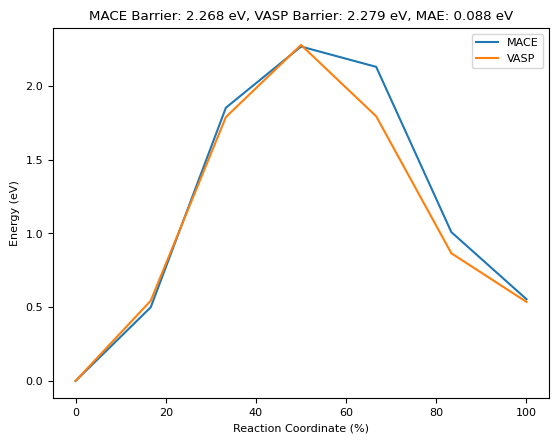

In [161]:
# get the energies
energies = [image.get_potential_energy() for image in images]
scaled_energies = [energy - energies[0] for energy in energies]

print(f"Scaled MACE energies: {scaled_energies}")

#vasp_energies = get_vasp_energies(data_dict, 'Cr6Ti5V107W5Zr2_rank_0')
#vasp_energies = get_vasp_energies(data_dict, 'Cr4Ti12V107WZr_rank_2')
#vasp_energies = get_vasp_energies(data_dict, 'Cr2Ti2V120W2Zr2_restart')
#vasp_energies = get_vasp_energies(data_dict, 'Cr5Ti5V115')
vasp_energies = get_vasp_energies(data_dict, 'Cr4Ti7V111W4Zr2_14_to_15')

barrier = max(scaled_energies) - scaled_energies[0]
vasp_barrier = max(vasp_energies) - vasp_energies[0]

# get the mae between vasp (truth) and mace (pred)
# Use min length for comparison to avoid index errors
min_length = min(len(scaled_energies), len(vasp_energies))
mae = np.mean(np.abs(np.array(vasp_energies[:min_length]) - np.array(scaled_energies[:min_length])))

# Create fractional coordinates for x-axis (0 to 100)
mace_x = np.linspace(0, 100, len(scaled_energies))
vasp_x = np.linspace(0, 100, len(vasp_energies))

# plot the energies with fractional coordinates
plt.plot(mace_x, scaled_energies, label='MACE')
plt.plot(vasp_x, vasp_energies, label='VASP')
plt.xlabel('Reaction Coordinate (%)')
plt.ylabel('Energy (eV)')
plt.title('MACE Barrier: ' + str(round(barrier, 3)) + ' eV, VASP Barrier: ' + str(round(vasp_barrier, 3)) + ' eV' + ', MAE: ' + str(round(mae, 3)) + ' eV')
plt.legend()
plt.show()


# Full-stack comparison

## Get the vasp results

In [166]:
from mace.calculators.mace import MACECalculator 
from ase.io import read, write
from ase.mep import DyNEB, NEB
from ase.optimize import FIRE, GPMin, MDMin
from ase.filters import FrechetCellFilter
import matplotlib.pyplot as plt
import numpy as np
import os

## generate relaxed perfect

In [187]:
def relax(atoms, calc, fmax=0.01, steps=150, relax_cell=False):
    new_atoms = atoms.copy()
    new_atoms.calc = calc
    if relax_cell:
        fcf = FrechetCellFilter(new_atoms)
        opt = FIRE(fcf)
    else:
        opt = FIRE(new_atoms)

    opt.run(fmax=fmax, steps=steps)
    return new_atoms


In [192]:
# path to the perfect starting structures
perfect_path = '../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin'
#model_paths = ['../potentials/mace_gen_7_ensemble/job_gen_7-2025-04-14_model_0_pr_stagetwo.model']
#model_paths = ['../potentials/gen_5_model_0-11-28_stagetwo.model']
model_paths = ['../potentials/gen_6_model_0_L0_isolated-2026-01-16_stagetwo.model']

atoms_dict = {}
# get all the folders in perfect_path and 
for folder in os.listdir(perfect_path):
    if os.path.isdir(os.path.join(perfect_path, folder)):
        atoms_dict[folder] = read(os.path.join(perfect_path, folder, 'POSCAR'))

print(atoms_dict.keys())

relaxed_atoms_dict = {}
# relax the perfect structures
for key in atoms_dict.keys():
    atoms_dict[key].calc = MACECalculator(model_paths=model_paths, device='cpu', default_dtype='float32')
    relaxed_atoms_dict[key] = relax(atoms_dict[key], atoms_dict[key].calc, relax_cell=True)

print(relaxed_atoms_dict.keys())


dict_keys(['Cr2Ti2V120W2Zr2', 'Cr4Ti7V11W4Zr2', 'Cr4Ti12V107WZr_rank_2', 'Cr6Ti5V107W5Zr2_rank_0', 'Cr5Ti5V115', 'Cr6Ti11V102W6Zr3'])


/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
FIRE:    0 21:14:43    -1152.978271        1.279524
FIRE:    1 21:14:44    -1153.221191        1.144832
FIRE:    2 21:14:44    -1153.612183        0.909128
FIRE:    3 21:14:45    -1154.014893        0.626218
FIRE:    4 21:14:45    -1154.311523        0.333734
FIRE:    5 21:14:46    -1154.434692        0.215248
FIRE:    6 21:14:46    -1154.397217        0.374347
FIRE:    7 21:14:46    -1154.403198        0.363978
FIRE:    8 21:14:47    -1154.414429        0.343696
FIRE:    9 21:14:47    -1154.430176        0.314367
FIRE:   10 21:14:48    -1154.448486        0.277242
FIRE:   11 21:14:48    -1154.467529        0.233832
FIRE:   12 21:14:49    -1154.484985        0.185919
FIRE:   13 21:14:49    -1154.500122        0.150732
FIRE:   14 21:14:50    -1154.512451        0.151651
FIRE:   15 21:14:50    -1154.519409        0.151902
FIRE:   16 21:14:51    -1154.520386        0.150974
FIRE:   17 21:14:51    -1154.520752        0.150894
FIRE:   18 21:

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
FIRE:    0 21:15:13    -1154.927490        1.292810
FIRE:    1 21:15:14    -1155.240967        1.160829
FIRE:    2 21:15:14    -1155.758301        0.931891
FIRE:    3 21:15:15    -1156.313965        0.703899
FIRE:    4 21:15:15    -1156.753174        0.407779
FIRE:    5 21:15:16    -1156.967285        0.251143
FIRE:    6 21:15:16    -1156.935059        0.392338
FIRE:    7 21:15:17    -1156.942017        0.379570
FIRE:    8 21:15:17    -1156.955688        0.354569
FIRE:    9 21:15:18    -1156.973755        0.318404
FIRE:   10 21:15:18    -1156.994873        0.272582
FIRE:   11 21:15:19    -1157.016602        0.219025
FIRE:   12 21:15:19    -1157.036377        0.163474
FIRE:   13 21:15:19    -1157.052979        0.118393
FIRE:   14 21:15:20    -1157.065674        0.096270
FIRE:   15 21:15:20    -1157.071289        0.081467
FIRE:   16 21:15:21    -1157.069824        0.107098
FIRE:   17 21:15:22    -1157.070190        0.105850
FIRE:   18 21:

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
FIRE:    0 21:15:39    -1109.831299        1.311397
FIRE:    1 21:15:40    -1110.079102        1.135117
FIRE:    2 21:15:40    -1110.491577        0.834821
FIRE:    3 21:15:41    -1110.945923        0.608767
FIRE:    4 21:15:41    -1111.331543        0.436318
FIRE:    5 21:15:42    -1111.572266        0.329541
FIRE:    6 21:15:42    -1111.643066        0.338605
FIRE:    7 21:15:43    -1111.648193        0.330595
FIRE:    8 21:15:43    -1111.657593        0.314911
FIRE:    9 21:15:44    -1111.671265        0.292226
FIRE:   10 21:15:44    -1111.687256        0.263491
FIRE:   11 21:15:44    -1111.704224        0.229926
FIRE:   12 21:15:45    -1111.721436        0.193041
FIRE:   13 21:15:45    -1111.737183        0.177039
FIRE:   14 21:15:46    -1111.751587        0.164787
FIRE:   15 21:15:46    -1111.763428        0.148393
FIRE:   16 21:15:47    -1111.771118        0.126713
FIRE:   17 21:15:47    -1111.775391        0.144498
FIRE:   18 21:

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
FIRE:    0 21:16:24    -1136.078613        1.319433
FIRE:    1 21:16:24    -1136.389771        1.193889
FIRE:    2 21:16:25    -1136.889526        0.972496
FIRE:    3 21:16:25    -1137.400757        0.701658
FIRE:    4 21:16:26    -1137.772461        0.415117
FIRE:    5 21:16:26    -1137.927246        0.340612
FIRE:    6 21:16:27    -1137.892334        0.436186
FIRE:    7 21:16:27    -1137.901855        0.423419
FIRE:    8 21:16:27    -1137.919434        0.398384
FIRE:    9 21:16:28    -1137.943604        0.362073
FIRE:   10 21:16:28    -1137.971191        0.315851
FIRE:   11 21:16:29    -1137.999146        0.261387
FIRE:   12 21:16:29    -1138.025024        0.200557
FIRE:   13 21:16:30    -1138.045532        0.140756
FIRE:   14 21:16:30    -1138.060303        0.083522
FIRE:   15 21:16:31    -1138.066406        0.097474
FIRE:   16 21:16:31    -1138.062866        0.129597
FIRE:   17 21:16:32    -1138.063110        0.127196
FIRE:   18 21:

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
FIRE:    0 21:16:51    -1119.859863        0.150477
FIRE:    1 21:16:52    -1119.860840        0.139787
FIRE:    2 21:16:52    -1119.863037        0.119561
FIRE:    3 21:16:53    -1119.865479        0.092001
FIRE:    4 21:16:53    -1119.867676        0.082679
FIRE:    5 21:16:54    -1119.869751        0.079762
FIRE:    6 21:16:54    -1119.871338        0.076484
FIRE:    7 21:16:55    -1119.873291        0.072963
FIRE:    8 21:16:55    -1119.874512        0.068934
FIRE:    9 21:16:56    -1119.876221        0.064409
FIRE:   10 21:16:56    -1119.878418        0.059374
FIRE:   11 21:16:57    -1119.880249        0.053766
FIRE:   12 21:16:57    -1119.882812        0.047454
FIRE:   13 21:16:58    -1119.885254        0.040272
FIRE:   14 21:16:58    -1119.887451        0.032071
FIRE:   15 21:16:59    -1119.889160        0.026162
FIRE:   16 21:16:59    -1119.890381        0.030218
FIRE:   17 21:16:59    -1119.891113        0.032512
FIRE:   18 21:

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
FIRE:    0 21:17:01    -1156.631836        1.386119
FIRE:    1 21:17:02    -1157.034424        1.249396
FIRE:    2 21:17:02    -1157.689453        1.037981
FIRE:    3 21:17:03    -1158.380005        0.778791
FIRE:    4 21:17:03    -1158.904175        0.497420
FIRE:    5 21:17:03    -1159.154785        0.413020
FIRE:    6 21:17:04    -1159.165161        0.473851
FIRE:    7 21:17:04    -1159.174561        0.457955
FIRE:    8 21:17:05    -1159.192139        0.426753
FIRE:    9 21:17:05    -1159.216797        0.381435
FIRE:   10 21:17:06    -1159.244873        0.323774
FIRE:   11 21:17:06    -1159.274902        0.256157
FIRE:   12 21:17:06    -1159.303223        0.242089
FIRE:   13 21:17:07    -1159.327637        0.237775
FIRE:   14 21:17:07    -1159.349121        0.232909
FIRE:   15 21:17:08    -1159.364502        0.227585
FIRE:   16 21:17:08    -1159.374023        0.221959
FIRE:   17 21:17:09    -1159.379639        0.216191
FIRE:   18 21:

In [193]:
import os
import numpy as np
from ase.io import read
from ase.geometry import find_mic # Import the MIC function
import json # Optional, for pretty printing the results

def compare_relaxed_structures(mace_relaxed_dict, vasp_results_path):
    """
    Compares MACE-relaxed structures with VASP-relaxed structures.

    Reads VASP results from OUTCAR files found in subdirectories of
    vasp_results_path matching the keys in mace_relaxed_dict.
    Calculates energy difference and mean atomic position difference
    (handling periodic boundaries manually using find_mic).

    Args:
        mace_relaxed_dict (dict): Dictionary where keys are structure
                                  identifiers and values are MACE-relaxed
                                  ASE Atoms objects.
        vasp_results_path (str): Path to the directory containing VASP result
                                 folders (e.g., '../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin').
                                 Each subfolder name should match a key in
                                 mace_relaxed_dict and contain an OUTCAR file.

    Returns:
        dict: A dictionary where keys are the structure identifiers, and
              values are dictionaries containing comparison metrics:
              'vasp_energy': Potential energy from VASP OUTCAR.
              'mace_energy': Potential energy from MACE relaxation.
              'energy_diff': Difference (mace_energy - vasp_energy).
              'mean_atom_distance': Mean distance between corresponding VASP
                                    and MACE atoms (using MIC).
              'num_atoms_vasp': Number of atoms in VASP structure.
              'num_atoms_mace': Number of atoms in MACE structure.
              'error': String description of any error encountered, or None.
    """
    comparison_data = {}
    print(f"Starting comparison for {len(mace_relaxed_dict)} structures...")

    for key, mace_atoms in mace_relaxed_dict.items():
        print(f"\nComparing structure: {key}")
        result_entry = {
            'vasp_energy': None,
            'mace_energy': None,
            'energy_diff': None,
            'mean_atom_distance': None,
            'num_atoms_vasp': 0,
            'num_atoms_mace': 0,
            'error': None
        }

        try:
            # --- Get VASP results ---
            vasp_folder_path = os.path.join(vasp_results_path, key)
            if not os.path.isdir(vasp_folder_path):
                raise FileNotFoundError(f"VASP results folder not found: {vasp_folder_path}")

            vasp_outcar_path = os.path.join(vasp_folder_path, 'OUTCAR')
            if not os.path.isfile(vasp_outcar_path):
                raise FileNotFoundError(f"VASP OUTCAR file not found: {vasp_outcar_path}")

            vasp_atoms = read(vasp_outcar_path, index=-1)
            print(f"  Read VASP OUTCAR from: {vasp_outcar_path}")

            # --- Get Energies ---
            vasp_energy = vasp_atoms.get_potential_energy()
            mace_energy = mace_atoms.get_potential_energy()

            result_entry['vasp_energy'] = vasp_energy
            result_entry['mace_energy'] = mace_energy
            result_entry['energy_diff'] = mace_energy - vasp_energy
            result_entry['num_atoms_vasp'] = len(vasp_atoms)
            result_entry['num_atoms_mace'] = len(mace_atoms)

            print(f"  VASP Energy: {vasp_energy:.4f} eV")
            print(f"  MACE Energy: {mace_energy:.4f} eV")
            print(f"  Difference:  {result_entry['energy_diff']:.4f} eV")

            # --- Compare Positions ---
            if len(vasp_atoms) != len(mace_atoms):
                raise ValueError(f"Atom count mismatch: VASP={len(vasp_atoms)}, MACE={len(mace_atoms)}")

            if len(vasp_atoms) == 0:
                 print("  Skipping position comparison (0 atoms).")
                 result_entry['mean_atom_distance'] = 0.0
            else:
                 # --- FIX 3: Manual distance calculation using find_mic ---
                 pos_vasp = vasp_atoms.get_positions()
                 pos_mace = mace_atoms.get_positions()
                 # Assuming cells are compatible, use VASP cell for MIC
                 cell = vasp_atoms.get_cell()
                 pbc = vasp_atoms.get_pbc() # Get periodic boundary conditions

                 atom_distances = []
                 for i in range(len(vasp_atoms)):
                     diff_vector = pos_vasp[i] - pos_mace[i]
                     # find_mic returns the shortest vector connecting the points
                     # respecting PBC, and its length (the distance)
                     mic_vector, distance = find_mic(diff_vector, cell, pbc)
                     atom_distances.append(distance)

                 mean_distance = np.mean(atom_distances)
                 result_entry['mean_atom_distance'] = mean_distance
                 print(f"  Mean atom distance (MIC): {mean_distance:.4f} Å")


        except FileNotFoundError as e:
            result_entry['error'] = str(e)
            print(f"  ERROR: {e}")
        except ValueError as e:
             result_entry['error'] = str(e)
             print(f"  ERROR: {e}")
        except IndexError as e: # Still catch if it occurs elsewhere
             result_entry['error'] = f"Indexing error occurred: {e}"
             print(f"  ERROR: {result_entry['error']}")
        except Exception as e:
            # Catch other potential errors
            result_entry['error'] = f"An unexpected error occurred: {e}"
            print(f"  ERROR: {result_entry['error']}")

        comparison_data[key] = result_entry

    print("\nComparison finished.")
    return comparison_data

In [194]:
print(relaxed_atoms_dict.keys())
print(relaxed_atoms_dict['Cr2Ti2V120W2Zr2'])

dict_keys(['Cr2Ti2V120W2Zr2', 'Cr4Ti7V11W4Zr2', 'Cr4Ti12V107WZr_rank_2', 'Cr6Ti5V107W5Zr2_rank_0', 'Cr5Ti5V115', 'Cr6Ti11V102W6Zr3'])
Atoms(symbols='Cr2Ti2V120W2Zr2', pbc=True, cell=[[11.996303430966032, -0.00011832953070458358, -0.00039401210177892015], [-0.00011831713138190504, 12.002869828532603, -0.00012648704515158605], [-0.00039400874709903205, -0.00012648927631130842, 11.998369053504549]], calculator=MACECalculator(...))


In [197]:
# --- Example Usage ---
# Ensure these are defined correctly from your previous cells:
# relaxed_atoms_dict = { ... dictionary with MACE relaxed Atoms objects ... }
# perfect_path = '../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin' # Path to VASP results

# Call the comparison function
perf_comparison_results = compare_relaxed_structures(relaxed_atoms_dict, perfect_path)

# Pretty print the results (optional)
print("\n--- Comparison Results ---")
print(json.dumps(perf_comparison_results, indent=2))

# Now you can analyze the 'comparison_results' dictionary.
# For example, to get the energy difference for a specific structure:
# energy_diff = comparison_results.get('Cr2Ti2V120W2Zr2', {}).get('energy_diff')
# if energy_diff is not None:
#    print(f"Energy difference for Cr2Ti2V120W2Zr2: {energy_diff}")

Starting comparison for 6 structures...

Comparing structure: Cr2Ti2V120W2Zr2
  Read VASP OUTCAR from: ../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin/Cr2Ti2V120W2Zr2/OUTCAR
  VASP Energy: -1150.4270 eV
  MACE Energy: -1154.6035 eV
  Difference:  -4.1765 eV
  Mean atom distance (MIC): 0.0439 Å

Comparing structure: Cr4Ti7V11W4Zr2
  Read VASP OUTCAR from: ../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin/Cr4Ti7V11W4Zr2/OUTCAR
  VASP Energy: -1153.1717 eV
  MACE Energy: -1157.0865 eV
  Difference:  -3.9148 eV
  Mean atom distance (MIC): 0.0504 Å

Comparing structure: Cr4Ti12V107WZr_rank_2
  Read VASP OUTCAR from: ../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin/Cr4Ti12V107WZr_rank_2/OUTCAR
  VASP Energy: -1108.0238 eV
  MACE Energy: -1111.8182 eV
  Difference:  -3.7944 eV
  Mean atom distance (MIC): 0.0358 Å

Comparing structure: Cr6Ti5V107W5Zr2_rank_0
  Read VASP OUTCAR from: ../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin/Cr6Ti5V107W5Zr2_rank_0/OUTCAR
  VASP Energy: -1134.1809 eV
  MA

## generate relaxed vacancies

### vacancy helper functions

In [203]:
import os
import numpy as np
from ase.io import read
from ase.geometry import find_mic # Import the MIC function
import json # Optional, for pretty printing the results

# --- Helper Function to Compare a Single Pair of Structures ---
def _compare_single_structure(mace_atoms, vasp_atoms):
    """
    Compares a single MACE Atoms object against a single VASP Atoms object.
    Internal helper function for compare_vacancy_endpoints.
    """
    comparison_metrics = {
        'vasp_energy': None,
        'mace_energy': None,
        'energy_diff': None,
        'mean_atom_distance': None,
        'num_atoms_vasp': 0,
        'num_atoms_mace': 0,
        'error': None
    }
    try:
        comparison_metrics['num_atoms_vasp'] = len(vasp_atoms)
        comparison_metrics['num_atoms_mace'] = len(mace_atoms)

        vasp_energy = vasp_atoms.get_potential_energy()
        # Make sure MACE energy is available (it should be if relaxed)
        mace_energy = mace_atoms.get_potential_energy()

        comparison_metrics['vasp_energy'] = vasp_energy
        comparison_metrics['mace_energy'] = mace_energy
        comparison_metrics['energy_diff'] = mace_energy - vasp_energy

        # Compare positions
        if len(vasp_atoms) != len(mace_atoms):
            raise ValueError(f"Atom count mismatch: VASP={len(vasp_atoms)}, MACE={len(mace_atoms)}")

        if len(vasp_atoms) == 0:
             comparison_metrics['mean_atom_distance'] = 0.0
        else:
             pos_vasp = vasp_atoms.get_positions()
             pos_mace = mace_atoms.get_positions()
             cell = vasp_atoms.get_cell() # Use VASP cell for consistency
             pbc = vasp_atoms.get_pbc()

             atom_distances = []
             for i in range(len(vasp_atoms)):
                 diff_vector = pos_vasp[i] - pos_mace[i]
                 mic_vector, distance = find_mic(diff_vector, cell, pbc)
                 atom_distances.append(distance)

             mean_distance = np.mean(atom_distances)
             comparison_metrics['mean_atom_distance'] = mean_distance

    except Exception as e:
        comparison_metrics['error'] = f"Error comparing structures: {e}"
        print(f"    ERROR comparing structures: {e}") # Add print statement here too

    return comparison_metrics

# --- Main Comparison Function for Vacancy Endpoints ---
def compare_vacancy_endpoints(mace_endpoints_dict, vasp_vac_results_path):
    """
    Compares MACE-relaxed vacancy endpoints with VASP-relaxed endpoints.

    Reads VASP results from OUTCAR files found in subdirectories like
    'Start_Index_X' and 'End_Index_Y' within vasp_vac_results_path,
    matching the keys in mace_endpoints_dict.

    Args:
        mace_endpoints_dict (dict): Dictionary where keys are structure
                                    identifiers (e.g., 'Comp_X_to_Y') and
                                    values are tuples of MACE-relaxed
                                    (start_Atoms, end_Atoms).
        vasp_vac_results_path (str): Path to the directory containing VASP result
                                     base folders (e.g., '../data/vasp_jobs-neb-test/mrs_vac_unstatic_fin').

    Returns:
        dict: A dictionary where keys are the structure identifiers, and
              values are dictionaries containing comparison metrics for both
              start and end points:
              {
                  'start_comparison': { 'vasp_energy': ..., 'mace_energy': ..., ... },
                  'end_comparison': { 'vasp_energy': ..., 'mace_energy': ..., ... },
                  'error': Overall error string for this key, or None.
              }
    """
    comparison_data = {}
    print(f"Starting comparison for {len(mace_endpoints_dict)} vacancy pathways...")

    for key, (mace_start_atoms, mace_end_atoms) in mace_endpoints_dict.items():
        print(f"\nComparing pathway: {key}")
        result_entry = {
            'start_comparison': {'error': None}, # Initialize sub-dictionaries
            'end_comparison': {'error': None},
            'error': None # Overall error for this pathway key
        }

        try:
            # --- Parse the key ---
            parts = key.split('_')
            if len(parts) < 4 or parts[-2] != 'to':
                raise ValueError(f"Key format incorrect: '{key}'. Expected 'BaseName_X_to_Y'.")

            end_idx = int(parts[-1])
            start_idx = int(parts[-3])
            base_folder_name = '_'.join(parts[:-3])
            print(f"  Base: {base_folder_name}, Start Index: {start_idx}, End Index: {end_idx}")

            # --- Locate and Compare START Point ---
            vasp_start_folder = os.path.join(vasp_vac_results_path, base_folder_name, f"Start_Index_{start_idx}")
            vasp_start_outcar = os.path.join(vasp_start_folder, 'OUTCAR')
            print(f"  Looking for VASP start OUTCAR: {vasp_start_outcar}")
            if not os.path.isfile(vasp_start_outcar):
                raise FileNotFoundError(f"VASP Start OUTCAR not found: {vasp_start_outcar}")

            vasp_start_atoms = read(vasp_start_outcar, index=-1)
            print(f"  Comparing START points (MACE vs VASP)...")
            result_entry['start_comparison'] = _compare_single_structure(mace_start_atoms, vasp_start_atoms)
            # Print summary for start
            if result_entry['start_comparison'].get('error') is None:
                print(f"    Start Energy Diff: {result_entry['start_comparison']['energy_diff']:.4f} eV")
                print(f"    Start Mean Atom Dist: {result_entry['start_comparison']['mean_atom_distance']:.4f} Å")


            # --- Locate and Compare END Point ---
            vasp_end_folder = os.path.join(vasp_vac_results_path, base_folder_name, f"End_Index_{end_idx}")
            vasp_end_outcar = os.path.join(vasp_end_folder, 'OUTCAR')
            print(f"  Looking for VASP end OUTCAR: {vasp_end_outcar}")
            if not os.path.isfile(vasp_end_outcar):
                raise FileNotFoundError(f"VASP End OUTCAR not found: {vasp_end_outcar}")

            vasp_end_atoms = read(vasp_end_outcar, index=-1)
            print(f"  Comparing END points (MACE vs VASP)...")
            result_entry['end_comparison'] = _compare_single_structure(mace_end_atoms, vasp_end_atoms)
            # Print summary for end
            if result_entry['end_comparison'].get('error') is None:
                print(f"    End Energy Diff: {result_entry['end_comparison']['energy_diff']:.4f} eV")
                print(f"    End Mean Atom Dist: {result_entry['end_comparison']['mean_atom_distance']:.4f} Å")


        except FileNotFoundError as e:
            result_entry['error'] = str(e)
            print(f"  ERROR: {e}")
        except ValueError as e:
             result_entry['error'] = str(e)
             print(f"  ERROR: {e}")
        except IndexError as e:
             result_entry['error'] = f"Indexing error occurred: {e}"
             print(f"  ERROR: {result_entry['error']}")
        except Exception as e:
            # Catch other potential errors
            result_entry['error'] = f"An unexpected error occurred: {e}"
            print(f"  ERROR: {result_entry['error']}")

        comparison_data[key] = result_entry

    print("\nComparison finished.")
    return comparison_data

In [198]:
# We have the relaxed perfect structures in atoms_dict
# We have the start/end atom indices for the vacancy jump in vac_indices

vac_data_path = '../data/vasp_jobs-neb-test/mrs_vac_unstatic_fin/'

vac_indices = {}
print(f"Scanning directory: {vac_data_path} for vacancy endpoint indices...")

# Check if the main path exists
if not os.path.isdir(vac_data_path):
    print(f"Error: Directory not found - {vac_data_path}")
else:
    # Iterate through the main composition folders (e.g., 'Cr2Ti2V120W2Zr2')
    for base_folder_name in os.listdir(vac_data_path):
        base_folder_path = os.path.join(vac_data_path, base_folder_name)

        # Ensure it's a directory
        if os.path.isdir(base_folder_path):
            print(f" Processing base folder: {base_folder_name}")
            start_index = None
            end_index = None

            try:
                # Look for the Start_Index_X and End_Index_Y subfolders within
                for subfolder_name in os.listdir(base_folder_path):
                    subfolder_path = os.path.join(base_folder_path, subfolder_name)

                    # Check if it's a directory before parsing
                    if os.path.isdir(subfolder_path):
                        if subfolder_name.startswith('Start_Index_'):
                            # Extract the number after the last underscore
                            parts = subfolder_name.split('_')
                            if len(parts) >= 3:
                                start_index = int(parts[-1])
                        elif subfolder_name.startswith('End_Index_'):
                            # Extract the number after the last underscore
                            parts = subfolder_name.split('_')
                            if len(parts) >= 3:
                                end_index = int(parts[-1])

                # If both start and end indices were found, create the dictionary entry
                if start_index is not None and end_index is not None:
                    # Construct the key in the format 'BaseFolderName_X_to_Y'
                    final_key = f"{base_folder_name}_{start_index}_to_{end_index}"
                    # Store the tuple of integers (X, Y)
                    vac_indices[final_key] = (start_index, end_index)
                    print(f"  -> Found: Key='{final_key}', Indices=({start_index}, {end_index})")
                else:
                    # Print a warning if indices couldn't be found for this folder
                    print(f"  Warning: Could not find both 'Start_Index_X' and 'End_Index_Y' subfolders in '{base_folder_name}'. Skipping.")

            except ValueError as e:
                print(f"  Error converting index to integer in folder '{base_folder_name}': {e}. Skipping.")
            except Exception as e:
                print(f"  An unexpected error occurred while processing folder '{base_folder_name}': {e}. Skipping.")


print("\n--- Generated vac_indices dictionary ---")
print(vac_indices)

# Create a new dictionary to store the relaxed vacancy migration endpoints
# Key: Original key from vac_indices (e.g., 'Cr2Ti2V120W2Zr2_98_to_117')
# Value: Tuple (relaxed_start_atoms, relaxed_end_atoms)
vac_relaxed_endpoints = {}

print("Original keys from vac_indices:", vac_indices.keys())

# Define the MACE calculator parameters (ensure these are set correctly)
# Example: model_paths = ['../path/to/your/model.model']
# Example: device = 'cpu'
# Example: default_dtype = 'float32'
default_dtype = 'float32'
device = 'cpu'
model_paths = ['../potentials/gen_6_model_0_L0_isolated-2026-01-16_stagetwo.model']

calculator_params = {
    'model_paths': model_paths,
    'device': device,
    'default_dtype': default_dtype
}
mace_calc = MACECalculator(**calculator_params) # Create calculator instance once

# Define the make_end_points function
def make_end_points(atoms, indices):
    # make a copy of the atoms
    start, end = atoms.copy(), atoms.copy()

    # move the end atom to the start atom's position
    # indices are 0-based from vac_indices, matching python indexing
    print(f" Moved end atom to start atom's position: {end[indices[1]].position} -> {atoms[indices[0]].position}")
    print(f" End atom position: {end[indices[1]].position}")
    print(f" Start atom position: {atoms[indices[0]].position}")
    end[indices[1]].position = atoms[indices[0]].position

    # remove the start atom (original atom at index 0) from the start and end structures
    start.pop(indices[0])
    end.pop(indices[0])

    return start, end

def relax(atoms, calc, fmax=0.01, steps=100, relax_cell=False):
    new_atoms = atoms.copy()
    new_atoms.calc = calc
    if relax_cell:
        fcf = FrechetCellFilter(new_atoms)
        opt = FIRE(fcf)
    else:
        opt = FIRE(new_atoms)

    opt.run(fmax=fmax, steps=steps)
    return new_atoms


Scanning directory: ../data/vasp_jobs-neb-test/mrs_vac_unstatic_fin/ for vacancy endpoint indices...
 Processing base folder: Cr2Ti2V120W2Zr2
  -> Found: Key='Cr2Ti2V120W2Zr2_98_to_117', Indices=(98, 117)
 Processing base folder: Cr4Ti7V111W4Zr2
  -> Found: Key='Cr4Ti7V111W4Zr2_14_to_15', Indices=(14, 15)
 Processing base folder: Cr4Ti12V107WZr_rank_2
  -> Found: Key='Cr4Ti12V107WZr_rank_2_101_to_97', Indices=(101, 97)
 Processing base folder: Cr6Ti5V107W5Zr2_rank_0
  -> Found: Key='Cr6Ti5V107W5Zr2_rank_0_41_to_17', Indices=(41, 17)
 Processing base folder: Cr5Ti5V115
  -> Found: Key='Cr5Ti5V115_17_to_23', Indices=(17, 23)
 Processing base folder: Cr6Ti11V102W6Zr3
  -> Found: Key='Cr6Ti11V102W6Zr3_60_to_54', Indices=(60, 54)

--- Generated vac_indices dictionary ---
{'Cr2Ti2V120W2Zr2_98_to_117': (98, 117), 'Cr4Ti7V111W4Zr2_14_to_15': (14, 15), 'Cr4Ti12V107WZr_rank_2_101_to_97': (101, 97), 'Cr6Ti5V107W5Zr2_rank_0_41_to_17': (41, 17), 'Cr5Ti5V115_17_to_23': (17, 23), 'Cr6Ti11V102W6Zr3_60

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


### Run the vacancy calculations

In [199]:
for key in vac_indices.keys():
    # Get the base structure key (e.g., 'Cr2Ti2V120W2Zr2')
    key_mod_parts = key.split('_')[:-3]
    key_mod = '_'.join(key_mod_parts)

    # Get the corresponding relaxed perfect structure
    if key_mod not in atoms_dict:
        print(f"Warning: Base structure key '{key_mod}' not found in atoms_dict for vacancy key '{key}'. Skipping.")
        continue
    perfect_atoms = atoms_dict[key_mod]

    # Get the start and end indices for the jump
    indices = vac_indices[key] # This should be a tuple like (start_idx, end_idx)

    print(f"\nProcessing: {key}")
    print(f"  Base structure: {key_mod}")
    print(f"  Jump indices in perfect structure: {indices}")

    # 1. Create the unrelaxed start and end points with the vacancy
    try:
        start_unrelaxed, end_unrelaxed = make_end_points(perfect_atoms, indices)
        print(f"  Created unrelaxed endpoints. Start atoms: {len(start_unrelaxed)}, End atoms: {len(end_unrelaxed)}")
    except IndexError as e:
        print(f"  Error creating endpoints for {key} with indices {indices} on structure size {len(perfect_atoms)}: {e}. Skipping.")
        continue

    # 2. Relax the start point (atoms only)
    print(f"  Relaxing start point...")
    start_relaxed = relax(start_unrelaxed, mace_calc, relax_cell=False) # Use the pre-defined relax function
    print(f"  Relaxed start point energy: {start_relaxed.get_potential_energy():.4f}")

    # 3. Relax the end point (atoms only)
    print(f"  Relaxing end point...")
    # Important: Need to attach a new calculator instance if the previous relax modified it,
    # or ensure the relax function doesn't keep state. Re-attaching is safer.
    # Re-using mace_calc instance should be fine if relax doesn't modify it.
    end_relaxed = relax(end_unrelaxed, mace_calc, relax_cell=False) # Use the pre-defined relax function
    print(f"  Relaxed end point energy: {end_relaxed.get_potential_energy():.4f}")

    # 4. Store the relaxed endpoints
    vac_relaxed_endpoints[key] = (start_relaxed, end_relaxed)

print("\nFinal relaxed endpoint keys:", vac_relaxed_endpoints.keys())

# Now vac_relaxed_endpoints contains tuples of (relaxed_start, relaxed_end) Atoms objects
# ready for NEB interpolation/setup.


Processing: Cr2Ti2V120W2Zr2_98_to_117
  Base structure: Cr2Ti2V120W2Zr2
  Jump indices in perfect structure: (98, 117)
 Moved end atom to start atom's position: [10.535 10.535  1.505] -> [9.03 0.   3.01]
 End atom position: [10.535 10.535  1.505]
 Start atom position: [9.03 0.   3.01]
  Created unrelaxed endpoints. Start atoms: 127, End atoms: 127
  Relaxing start point...
      Step     Time          Energy          fmax
FIRE:    0 21:19:11    -1140.930176        1.159269
FIRE:    1 21:19:12    -1141.169678        1.066935
FIRE:    2 21:19:12    -1141.564941        0.922101
FIRE:    3 21:19:12    -1141.989136        0.728155
FIRE:    4 21:19:12    -1142.328857        0.498613
FIRE:    5 21:19:12    -1142.511597        0.303391
FIRE:    6 21:19:13    -1142.530762        0.358819
FIRE:    7 21:19:13    -1142.536621        0.349059
FIRE:    8 21:19:13    -1142.547363        0.329953
FIRE:    9 21:19:13    -1142.562866        0.302314
FIRE:   10 21:19:14    -1142.581055        0.267278
F

In [204]:
# --- Example Usage ---
# Ensure these are defined correctly from your previous cells:
# relaxed_atoms_dict = { ... dictionary with MACE relaxed Atoms objects ... }
# perfect_path = '../data/vasp_jobs-neb-test/mrs_perf_unstatic_fin' # Path to VASP results

# Call the comparison function
vac_comparison_results = compare_vacancy_endpoints(vac_relaxed_endpoints, vac_data_path)

# Pretty print the results (optional)
print("\n--- Comparison Results ---")
print(json.dumps(vac_comparison_results, indent=2))

# Now you can analyze the 'comparison_results' dictionary.
# For example, to get the energy difference for a specific structure:
# energy_diff = comparison_results.get('Cr2Ti2V120W2Zr2', {}).get('energy_diff')
# if energy_diff is not None:
#    print(f"Energy difference for Cr2Ti2V120W2Zr2: {energy_diff}")

Starting comparison for 5 vacancy pathways...

Comparing pathway: Cr2Ti2V120W2Zr2_98_to_117
  Base: Cr2Ti2V120W2Zr2, Start Index: 98, End Index: 117
  Looking for VASP start OUTCAR: ../data/vasp_jobs-neb-test/mrs_vac_unstatic_fin/Cr2Ti2V120W2Zr2/Start_Index_98/OUTCAR
  Comparing START points (MACE vs VASP)...
    Start Energy Diff: -3.6714 eV
    Start Mean Atom Dist: 0.0289 Å
  Looking for VASP end OUTCAR: ../data/vasp_jobs-neb-test/mrs_vac_unstatic_fin/Cr2Ti2V120W2Zr2/End_Index_117/OUTCAR
  Comparing END points (MACE vs VASP)...
    End Energy Diff: -4.5325 eV
    End Mean Atom Dist: 0.1238 Å

Comparing pathway: Cr4Ti12V107WZr_rank_2_101_to_97
  Base: Cr4Ti12V107WZr_rank_2, Start Index: 101, End Index: 97
  Looking for VASP start OUTCAR: ../data/vasp_jobs-neb-test/mrs_vac_unstatic_fin/Cr4Ti12V107WZr_rank_2/Start_Index_101/OUTCAR
  Comparing START points (MACE vs VASP)...
    Start Energy Diff: -3.5429 eV
    Start Mean Atom Dist: 0.0401 Å
  Looking for VASP end OUTCAR: ../data/vasp_j

## generate neb end points

In [218]:
import numpy as np
from ase.mep import DyNEB # Or DyNEB if you prefer/need dynamic step size
from ase.optimize import FIRE
from mace.calculators.mace import MACECalculator
import os # Assuming os is needed if model_paths are relative

def run_neb(start,
            end,
            model_paths,
            climb=True,
            default_dtype='float32',
            device='cpu',
            num_images=5, # Number of *intermediate* images
            fmax=0.05,
            steps=200,
            k=0.1): # Spring constant for NEB
    """Runs an NEB calculation between start and end atoms objects."""

    print(f"  Setting up NEB with {num_images} intermediate images...")
    # --- Correction: Need to include the start image explicitly ---
    images = [start.copy()] + [start.copy() for _ in range(num_images)] + [end.copy()]
    print(f"  Total images including endpoints: {len(images)}")

    # Use NEB (or DyNEB)
    neb = DyNEB(images, k=k, climb=climb, allow_shared_calculator=True) # allow_shared makes setup easier

    print("  Interpolating initial path...")
    neb.interpolate(mic=True) # mic=True is important for periodic systems

    print("  Attaching MACE calculator to images...")
    # Attach calculator to all images AFTER interpolation
    for image in neb.images:
        image.calc = MACECalculator(model_paths=model_paths, device=device, default_dtype=default_dtype)

    print("  Starting NEB optimization (FIRE)...")
    opt = FIRE(neb)
    opt.run(fmax=fmax, steps=steps)
    #print(f"  NEB optimization finished. Final fmax: {neb.get_forces().max():.4f}")

    return neb


In [219]:
# get the neb data
neb_data_path = '../data/vasp_jobs-neb-test/mrs_neb_static_fin'

neb_data_dict = {}
# need to get all the folders in data_path that start with 'Cr'
neb_folders = [f for f in os.listdir(neb_data_path) if f.startswith('Cr')]

for folder in neb_folders:
    neb_data_dict[folder] = {}
    # find all subdirectories in folder that contain 'OUTCAR'
    subfolders = [f for f in os.listdir(os.path.join(neb_data_path, folder)) if os.path.isdir(os.path.join(neb_data_path, folder, f)) and 'OUTCAR' in os.listdir(os.path.join(neb_data_path, folder, f))]
    for subfolder in subfolders:
        atoms = read(os.path.join(neb_data_path, folder, subfolder, 'OUTCAR'))
        neb_data_dict[folder][subfolder] = atoms.get_potential_energy()
    
    #print("Pre-sorted energies:")
    #print(data_dict[folder])
    # sort the energies by the subfolder name
    neb_data_dict[folder] = dict(sorted(neb_data_dict[folder].items(), key=lambda x: x[0]))
    #print("Post-sorted energies:")
    #print(data_dict[folder])

    # get the barrier max(energy) - energy[0]
    #print("Keys:")
    #print(data_dict[folder].keys())
    barrier = max(neb_data_dict[folder].values()) - neb_data_dict[folder]['00']
    neb_data_dict[folder]['barrier'] = barrier

In [220]:

# --- Main script to run NEB for all endpoints ---
model_paths = ['../potentials/gen_6_model_0_L0_isolated-2026-01-16_stagetwo.model']
default_dtype = 'float32'
device = 'cpu'
mace_neb_results = {}
default_num_intermediate_images = 5 # Matches the VASP data structure ('00' to '06')
neb_fmax = 0.05  # Convergence criterion for NEB
neb_steps = 200 # Max steps for NEB optimizer

print(f"Starting NEB calculations for {len(vac_relaxed_endpoints)} pathways...")

for key, (start_atoms, end_atoms) in vac_relaxed_endpoints.items():
    print(f"\nRunning NEB for: {key}")

    try:
        # Run the NEB calculation
        neb_calculation = run_neb(
            start=start_atoms,
            end=end_atoms,
            model_paths=model_paths,
            climb=True,
            default_dtype=default_dtype,
            device=device,
            num_images=default_num_intermediate_images,
            fmax=neb_fmax,
            steps=neb_steps
        )

        # Extract energies
        energies = [img.get_potential_energy() for img in neb_calculation.images]

        # Calculate barrier
        barrier = max(energies) - energies[0]

        # Create the results dictionary for this key
        result_entry = {}
        for i, energy in enumerate(energies):
            image_key = f"{i:02d}" # Format as '00', '01', etc.
            result_entry[image_key] = energy
        result_entry['barrier'] = barrier

        # Store it in the main results dictionary
        mace_neb_results[key] = result_entry
        print(f"  Stored results for {key}. Barrier = {barrier:.4f} eV")

    except Exception as e:
        print(f"  ERROR running NEB for {key}: {e}")
        # Optionally store None or an error message
        mace_neb_results[key] = {"error": str(e)}

print("\n--- MACE NEB Results ---")
# You can optionally print the results here for verification
# import json
# print(json.dumps(mace_neb_results, indent=2))

print("\nComparison Preparation:")
print("`mace_neb_results` dictionary is now ready.")
print("To compare with `data_dict` (VASP results):")
print("1. Iterate through the keys present in both dictionaries.")
print("2. For each key, extract the list of VASP energies and MACE energies.")
print("3. Scale both energy lists by subtracting their respective starting energy (energy['00']).")
print("4. Compare the scaled energy profiles and the calculated barriers ('barrier').")

Starting NEB calculations for 5 pathways...

Running NEB for: Cr2Ti2V120W2Zr2_98_to_117
  Setting up NEB with 5 intermediate images...
  Total images including endpoints: 7
  Interpolating initial path...
  Attaching MACE calculator to images...


/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_locati

  Starting NEB optimization (FIRE)...
      Step     Time          Energy          fmax
FIRE:    0 21:34:31    -1141.356323        3.176677
FIRE:    1 21:34:34    -1141.517944        2.637840
FIRE:    2 21:34:36    -1141.749023        1.801908
FIRE:    3 21:34:38    -1141.945068        1.048297
FIRE:    4 21:34:40    -1142.052124        0.676053
FIRE:    5 21:34:43    -1142.076416        0.673450
FIRE:    6 21:34:45    -1142.060791        0.897144
FIRE:    7 21:34:47    -1142.066040        0.869398
FIRE:    8 21:34:50    -1142.076416        0.815005
FIRE:    9 21:34:52    -1142.090454        0.736091
FIRE:   10 21:34:54    -1142.106934        0.635619
FIRE:   11 21:34:56    -1142.124390        0.517147
FIRE:   12 21:34:58    -1142.140747        0.384657
FIRE:   13 21:35:00    -1142.155029        0.290206
FIRE:   14 21:35:03    -1142.166260        0.238595
FIRE:   15 21:35:05    -1142.173706        0.188416
FIRE:   16 21:35:07    -1142.176636        0.265323
FIRE:   17 21:35:10    -1142

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_locati

  Starting NEB optimization (FIRE)...
      Step     Time          Energy          fmax
FIRE:    0 21:35:56    -1100.041626        0.571794
FIRE:    1 21:35:58    -1100.056641        0.513153
FIRE:    2 21:36:00    -1100.081543        0.406161
FIRE:    3 21:36:03    -1100.108398        0.269451
FIRE:    4 21:36:05    -1100.129272        0.169625
FIRE:    5 21:36:07    -1100.139404        0.209777
FIRE:    6 21:36:09    -1100.141113        0.211030
FIRE:    7 21:36:11    -1100.139648        0.217469
FIRE:    8 21:36:13    -1100.140015        0.211169
FIRE:    9 21:36:16    -1100.140869        0.201556
FIRE:   10 21:36:18    -1100.141968        0.194173
FIRE:   11 21:36:20    -1100.143555        0.184909
FIRE:   12 21:36:23    -1100.144775        0.174224
FIRE:   13 21:36:25    -1100.145752        0.162668
FIRE:   14 21:36:27    -1100.146973        0.150831
FIRE:   15 21:36:29    -1100.147705        0.136496
FIRE:   16 21:36:30    -1100.148193        0.124582
FIRE:   17 21:36:31    -1100

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_locati

  Starting NEB optimization (FIRE)...
      Step     Time          Energy          fmax
FIRE:    0 21:36:39    -1125.052612        1.719060
FIRE:    1 21:36:41    -1125.148926        1.517742
FIRE:    2 21:36:44    -1125.294678        1.168627
FIRE:    3 21:36:46    -1125.427002        0.770990
FIRE:    4 21:36:48    -1125.503906        0.459974
FIRE:    5 21:36:50    -1125.524536        0.500277
FIRE:    6 21:36:53    -1125.518311        0.651036
FIRE:    7 21:36:55    -1125.522705        0.627084
FIRE:    8 21:36:57    -1125.530151        0.580149
FIRE:    9 21:36:59    -1125.540527        0.512145
FIRE:   10 21:37:01    -1125.552734        0.425969
FIRE:   11 21:37:04    -1125.565063        0.325517
FIRE:   12 21:37:06    -1125.576050        0.224001
FIRE:   13 21:37:08    -1125.585327        0.163631
FIRE:   14 21:37:10    -1125.592285        0.119605
FIRE:   15 21:37:13    -1125.596191        0.146430
FIRE:   16 21:37:15    -1125.597656        0.234048
FIRE:   17 21:37:17    -1125

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_locati

  Starting NEB optimization (FIRE)...
      Step     Time          Energy          fmax
FIRE:    0 21:37:45    -1107.445068        0.784386
FIRE:    1 21:37:47    -1107.481201        0.691425
FIRE:    2 21:37:49    -1107.539795        0.528695
FIRE:    3 21:37:52    -1107.598633        0.350766
FIRE:    4 21:37:54    -1107.640747        0.191320
FIRE:    5 21:37:56    -1107.659180        0.169101
FIRE:    6 21:37:59    -1107.661621        0.266379
FIRE:    7 21:38:01    -1107.662964        0.258053
FIRE:    8 21:38:03    -1107.665405        0.241664
FIRE:    9 21:38:05    -1107.669189        0.217722
FIRE:   10 21:38:07    -1107.673096        0.187045
FIRE:   11 21:38:10    -1107.677490        0.150684
FIRE:   12 21:38:12    -1107.681763        0.110038
FIRE:   13 21:38:14    -1107.685303        0.087205
FIRE:   14 21:38:16    -1107.688965        0.081365
FIRE:   15 21:38:18    -1107.691528        0.075156
FIRE:   16 21:38:21    -1107.693237        0.078857
FIRE:   17 21:38:23    -1107

/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/opt/homebrew/Caskroom/miniforge/base/envs/forge/lib/python3.11/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_locati

  Starting NEB optimization (FIRE)...
      Step     Time          Energy          fmax
FIRE:    0 21:38:36    -1146.556152        1.199342
FIRE:    1 21:38:38    -1146.604736        0.981175
FIRE:    2 21:38:40    -1146.678101        0.608186
FIRE:    3 21:38:43    -1146.744751        0.387423
FIRE:    4 21:38:45    -1146.784424        0.263263
FIRE:    5 21:38:47    -1146.797729        0.493598
FIRE:    6 21:38:49    -1146.799072        0.560935
FIRE:    7 21:38:52    -1146.801514        0.539967
FIRE:    8 21:38:54    -1146.806152        0.498763
FIRE:    9 21:38:56    -1146.812378        0.438839
FIRE:   10 21:38:58    -1146.819580        0.362523
FIRE:   11 21:39:00    -1146.826660        0.272979
FIRE:   12 21:39:03    -1146.833496        0.174439
FIRE:   13 21:39:05    -1146.838989        0.131436
FIRE:   14 21:39:07    -1146.843994        0.130026
FIRE:   15 21:39:09    -1146.847412        0.148680
FIRE:   16 21:39:12    -1146.849976        0.225540
FIRE:   17 21:39:14    -1146

In [212]:
print("\n--- MACE NEB Results ---")
# You can optionally print the results here for verification
# import json
# print(json.dumps(mace_neb_results, indent=2))

print("\nComparison Preparation:")
print("`mace_neb_results` dictionary is now ready.")
print("To compare with `data_dict` (VASP results):")
print("1. Iterate through the keys present in both dictionaries.")
print("2. For each key, extract the list of VASP energies and MACE energies.")
print("3. Scale both energy lists by subtracting their respective starting energy (energy['00']).")
print("4. Compare the scaled energy profiles and the calculated barriers ('barrier').")


--- MACE NEB Results ---

Comparison Preparation:
`mace_neb_results` dictionary is now ready.
To compare with `data_dict` (VASP results):
1. Iterate through the keys present in both dictionaries.
2. For each key, extract the list of VASP energies and MACE energies.
3. Scale both energy lists by subtracting their respective starting energy (energy['00']).
4. Compare the scaled energy profiles and the calculated barriers ('barrier').


## Plot and compare

In [222]:
import numpy as np
import json # For pretty printing the output if desired

def compare_neb_results(vasp_results, mace_results):
    """
    Compares VASP and MACE NEB results for common pathways.

    Extracts scaled energy profiles, barriers, calculates barrier differences,
    and the Mean Absolute Error (MAE) between the scaled profiles.

    Args:
        vasp_results (dict): Dictionary containing VASP NEB results.
                             Expected structure per key: {'00': E0, '01': E1, ..., 'barrier': B}.
        mace_results (dict): Dictionary containing MACE NEB results with the same structure.

    Returns:
        dict: A dictionary where keys are the common pathway identifiers (e.g.,
              'Cr2Ti2V120W2Zr2_98_to_117'), and values are dictionaries containing:
              'vasp_energies_scaled': List of scaled VASP energies [0.0, E1-E0, ...].
              'mace_energies_scaled': List of scaled MACE energies [0.0, E1-E0, ...].
              'vasp_barrier': VASP barrier height.
              'mace_barrier': MACE barrier height.
              'barrier_diff': Difference (MACE_barrier - VASP_barrier).
              'mae_profile': MAE between scaled energy profiles.
              'num_images_vasp': Number of images in the VASP path.
              'num_images_mace': Number of images in the MACE path.
              'error': String description of any error encountered for this key, or None.
    """
    comparison_output = {}
    # Find keys present in both dictionaries
    common_keys = set(vasp_results.keys()) & set(mace_results.keys())

    print(f"Found {len(common_keys)} common pathways for comparison.")
    if not common_keys:
        print("No common keys found between VASP and MACE results.")
        return comparison_output

    for key in common_keys:
        print(f"\nComparing pathway: {key}")
        vasp_entry = vasp_results[key]
        mace_entry = mace_results[key]
        result_data = {
            'vasp_energies_scaled': None,
            'mace_energies_scaled': None,
            'vasp_barrier': None,
            'mace_barrier': None,
            'barrier_diff': None,
            'mae_profile': None,
            'num_images_vasp': 0,
            'num_images_mace': 0,
            'error': None
        }

        try:
            # Check for errors from the MACE calculation step
            if isinstance(mace_entry, dict) and 'error' in mace_entry and mace_entry['error']:
                 raise ValueError(f"MACE NEB calculation failed: {mace_entry['error']}")

            # --- Extract VASP data ---
            vasp_image_keys = sorted([k for k in vasp_entry if k.isdigit()])
            if not vasp_image_keys or '00' not in vasp_image_keys:
                 raise ValueError("VASP entry missing image keys ('00', '01', ...)")
            vasp_energies_abs = [vasp_entry[img_key] for img_key in vasp_image_keys]
            vasp_barrier = vasp_entry.get('barrier')
            if vasp_barrier is None:
                 raise ValueError("VASP entry missing 'barrier' key")
            result_data['num_images_vasp'] = len(vasp_energies_abs)

            # --- Extract MACE data ---
            mace_image_keys = sorted([k for k in mace_entry if k.isdigit()])
            if not mace_image_keys or '00' not in mace_image_keys:
                 raise ValueError("MACE entry missing image keys ('00', '01', ...)")
            mace_energies_abs = [mace_entry[img_key] for img_key in mace_image_keys]
            mace_barrier = mace_entry.get('barrier')
            if mace_barrier is None:
                 raise ValueError("MACE entry missing 'barrier' key")
            result_data['num_images_mace'] = len(mace_energies_abs)

            # --- Scale energies ---
            vasp_e0 = vasp_energies_abs[0]
            mace_e0 = mace_energies_abs[0]
            vasp_energies_scaled = list(np.array(vasp_energies_abs) - vasp_e0)
            mace_energies_scaled = list(np.array(mace_energies_abs) - mace_e0)

            result_data['vasp_energies_scaled'] = vasp_energies_scaled
            result_data['mace_energies_scaled'] = mace_energies_scaled
            result_data['vasp_barrier'] = vasp_barrier
            result_data['mace_barrier'] = mace_barrier

            # --- Calculate metrics ---
            result_data['barrier_diff'] = mace_barrier - vasp_barrier

            # Calculate MAE only if the number of images is the same
            if len(vasp_energies_scaled) == len(mace_energies_scaled):
                mae = np.mean(np.abs(np.array(vasp_energies_scaled) - np.array(mace_energies_scaled)))
                result_data['mae_profile'] = mae
                print(f"  VASP Barrier: {vasp_barrier:.4f} eV")
                print(f"  MACE Barrier: {mace_barrier:.4f} eV")
                print(f"  Difference:   {result_data['barrier_diff']:.4f} eV")
                print(f"  Profile MAE:  {mae:.4f} eV")
            else:
                result_data['mae_profile'] = None # Indicate MAE not calculated
                print(f"  VASP Barrier: {vasp_barrier:.4f} eV ({len(vasp_energies_scaled)} images)")
                print(f"  MACE Barrier: {mace_barrier:.4f} eV ({len(mace_energies_scaled)} images)")
                print(f"  Difference:   {result_data['barrier_diff']:.4f} eV")
                print("  Skipping profile MAE calculation (different number of images).")

        except Exception as e:
            result_data['error'] = str(e)
            print(f"  ERROR processing {key}: {e}")

        comparison_output[key] = result_data

    return comparison_output



In [223]:
# --- Example Usage ---
# Assuming 'data_dict' contains your VASP results and
# 'mace_neb_results' contains your MACE results from the previous step.

# # Make sure data_dict and mace_neb_results are defined and populated
# data_dict = { ... your vasp results ... }
# mace_neb_results = { ... your mace results ... }

neb_comparison_results = compare_neb_results(neb_data_dict, mace_neb_results)

print("\n--- Comparison Results ---")
print(json.dumps(neb_comparison_results, indent=2))

# # You can now access specific results like:
# # comparison_results['Cr2Ti2V120W2Zr2_98_to_117']['mae_profile']
# # comparison_results['Cr2Ti2V120W2Zr2_98_to_117']['barrier_diff']

Found 5 common pathways for comparison.

Comparing pathway: Cr2Ti2V120W2Zr2_98_to_117
  VASP Barrier: 1.5820 eV
  MACE Barrier: 0.4089 eV
  Difference:   -1.1731 eV
  Profile MAE:  0.7379 eV

Comparing pathway: Cr6Ti11V102W6Zr3_60_to_54
  VASP Barrier: 0.4045 eV
  MACE Barrier: 0.4698 eV
  Difference:   0.0653 eV
  Profile MAE:  0.1085 eV

Comparing pathway: Cr5Ti5V115_17_to_23
  VASP Barrier: 4.6976 eV
  MACE Barrier: 0.4436 eV
  Difference:   -4.2540 eV
  Profile MAE:  1.7427 eV

Comparing pathway: Cr4Ti12V107WZr_rank_2_101_to_97
  VASP Barrier: 0.4424 eV
  MACE Barrier: 0.4448 eV
  Difference:   0.0024 eV
  Profile MAE:  0.0209 eV

Comparing pathway: Cr6Ti5V107W5Zr2_rank_0_41_to_17
  VASP Barrier: 0.6959 eV
  MACE Barrier: 0.6968 eV
  Difference:   0.0009 eV
  Profile MAE:  0.0481 eV

--- Comparison Results ---
{
  "Cr2Ti2V120W2Zr2_98_to_117": {
    "vasp_energies_scaled": [
      0.0,
      0.2740917599999193,
      1.076756929999874,
      1.5820275999999467,
      1.1961934599999

# Graveyard

In [ ]:
# get the energies
energies = [image.get_potential_energy() for image in images]
scaled_energies = [energy - energies[0] for energy in energies]

print(f"Scaled MACE energies: {scaled_energies}")

#vasp_energies = get_vasp_energies(data_dict, 'Cr6Ti5V107W5Zr2_rank_0')
#vasp_energies = get_vasp_energies(data_dict, 'Cr4Ti12V107WZr_rank_2')
vasp_energies = get_vasp_energies(data_dict, 'Cr2Ti2V120W2Zr2_restart')

barrier = max(scaled_energies) - scaled_energies[0]
vasp_barrier = max(vasp_energies) - vasp_energies[0]

# get the mae between vasp (truth) and mace (pred)
# Use min length for comparison to avoid index errors
min_length = min(len(scaled_energies), len(vasp_energies))
mae = np.mean(np.abs(np.array(vasp_energies[:min_length]) - np.array(scaled_energies[:min_length])))

# Create fractional coordinates for x-axis (0 to 100)
mace_x = np.linspace(0, 100, len(scaled_energies))
vasp_x = np.linspace(0, 100, len(vasp_energies))

# plot the energies with fractional coordinates
plt.plot(mace_x, scaled_energies, label='MACE')
plt.plot(vasp_x, vasp_energies, label='VASP')
plt.xlabel('Reaction Coordinate (%)')
plt.ylabel('Energy (eV)')
plt.title('MACE Barrier: ' + str(round(barrier, 3)) + ' eV, VASP Barrier: ' + str(round(vasp_barrier, 3)) + ' eV' + ', MAE: ' + str(round(mae, 3)) + ' eV')
plt.legend()
plt.show()
